## IPL First Innings Score Prediction
### Author: Prajwal S (prajwalk7@gmail.com)

In [49]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#Loading the dataset
df = pd.read_csv('ipl.csv')

In [51]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [52]:
df.shape

(76014, 15)

In [53]:
#lets remove unwanted features
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(columns_to_remove, axis = 'columns', inplace = True)

In [54]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [55]:
df.shape

(76014, 9)

In [56]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [57]:
#lets take into consideration only the teams who have played more than 4 seasons
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [58]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [59]:
df.shape

(53811, 9)

In [60]:
#we can make better predictions by considering the status of the match after at least 5 overs in the match have been completed
df = df[df['overs'] >= 5.0]

In [61]:
df.shape

(40108, 9)

In [62]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [63]:
#lets convert date from string to datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [64]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [65]:
#One-hot encoding for categorical variables
encoded_df = pd.get_dummies(data = df, columns = ['bat_team', 'bowl_team'])

In [66]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [67]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [68]:
#lets rearrange the columns for convenience
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [69]:
#splitting the data into test and training data
X_train = encoded_df.drop(labels = 'total', axis = 'columns')[encoded_df.date.dt.year <= 2016]
X_test = encoded_df.drop(labels = 'total', axis = 'columns')[encoded_df.date.dt.year >= 2017]

In [70]:
y_train = encoded_df[encoded_df.date.dt.year <= 2016]['total']
y_test = encoded_df[encoded_df.date.dt.year >= 2017]['total']

In [71]:
#lets remove the 'date' column
X_train.drop(labels = 'date', axis = True, inplace = True)
X_test.drop(labels = 'date', axis = True, inplace = True)

In [72]:
#Model Building, first lets try Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
y_test.values

array([207, 207, 207, ..., 107, 107, 107])

In [74]:
X_test

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
68894,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,5.1,46,1,42,1
68895,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,5.2,50,1,46,1
68896,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,5.3,50,1,44,1
68897,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,5.4,54,1,48,1
68898,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,5.5,58,1,51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,18.1,106,9,29,4
75885,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,18.2,107,9,29,4
75886,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,18.3,107,9,28,4
75887,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,18.4,107,9,24,4


In [75]:
pred_lin_reg = lin_reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


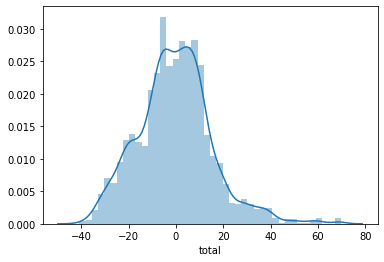

In [76]:
import seaborn as sns
sns.distplot(pred_lin_reg - y_test)
plt.show()

In [77]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred_lin_reg)

12.11861754619329

In [78]:
#now lets try Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.61566e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.41749e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.45442e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.40095e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.62242e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [79]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-328.4152792487924


In [80]:
pred_ridge_reg = ridge_regressor.predict(X_test)

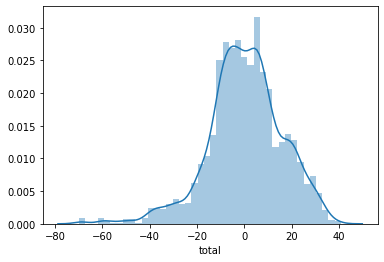

In [81]:
sns.distplot(y_test - pred_ridge_reg)
plt.show()

In [82]:
mean_absolute_error(y_test, pred_ridge_reg)

12.117294527005022

In [83]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4551025.751773752, tolerance: 2529.9556965945594
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4460509.8528243825, tolerance: 2547.038071028663
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4658253.604100358, tolerance: 2667.8126904366486
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4332382.4

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [84]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-320.8263789858526


In [85]:
pred_lasso_reg = lasso_regressor.predict(X_test)

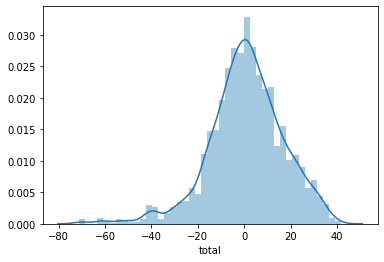

In [86]:
sns.distplot(y_test - pred_lasso_reg)
plt.show()

In [87]:
mean_absolute_error(y_test, pred_lasso_reg)

12.214053814850246

In [88]:
from sklearn.tree import DecisionTreeRegressor

dec_reg = DecisionTreeRegressor(random_state = 10)
dec_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

In [89]:
pred_dec_reg = dec_reg.predict(X_test)

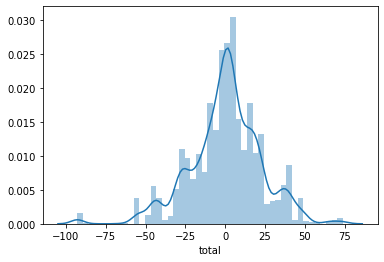

In [90]:
sns.distplot(y_test - pred_dec_reg)

In [91]:
mean_absolute_error(y_test, pred_dec_reg)

16.67170626349892

In [92]:
from sklearn.tree import export_graphviz
import sklearn.tree

export_graphviz(dec_reg, out_file = 'tree.dot')

In [94]:
#lets try RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rand_reg = RandomForestRegressor()
param_grid = {
    'bootstrap': [True],
    'max_depth': [25, 50, 75, 100],
    'n_estimators': [25, 50, 100, 150]
}
randf_reg = GridSearchCV(rand_reg, param_grid, scoring='neg_mean_squared_error', cv=5)
randf_reg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [95]:
#the following are the best parameters as determinged by GridSearchCV
print(randf_reg.best_estimator_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [96]:
pred_randf_reg = randf_reg.predict(X_test)

In [97]:
mean_absolute_error(y_test, pred_randf_reg)

13.78694820283187

In [98]:
#lets compare the Mean Absolute Error values for the different regressions performed
print('MAE for Linear Regression: ', mean_absolute_error(y_test, pred_lin_reg))
print('MAE for Ridge Regression: ', mean_absolute_error(y_test, pred_ridge_reg))
print('MAE for Lasso Regression: ', mean_absolute_error(y_test, pred_lasso_reg))
print('MAE for Decision Tree Refressor: ', mean_absolute_error(y_test, pred_dec_reg))
print('MAE for Random Forest Regressor: ', mean_absolute_error(y_test, pred_randf_reg))

MAE for Linear Regression:  12.11861754619329
MAE for Ridge Regression:  12.117294527005022
MAE for Lasso Regression:  12.214053814850246
MAE for Decision Tree Refressor:  16.67170626349892
MAE for Random Forest Regressor:  13.78694820283187


## We found Ridge Regression has the lowest MAE, so we'll use the same in our pickle file to deploy the model.

In [99]:
# Creating a pickle file for the model
import pickle as pkl
filename = 'first-innings-score-ridge-model.pkl'
pkl.dump(ridge_regressor, open(filename, 'wb'))